In [6]:
n = 4
board = [["."] * n for i in range(n)]
joinedBoard = ["".join(boardRow) for boardRow in board]
print(board)
print(joinedBoard)

test = ["."] * n
print(test)

[['.', '.', '.', '.'], ['.', '.', '.', '.'], ['.', '.', '.', '.'], ['.', '.', '.', '.']]
['....', '....', '....', '....']
['.', '.', '.', '.']


In [4]:
board = ["." * n for i in range(n)]
print(board)

board = ["." * i for i in range(n)]
print(board)

['....', '....', '....', '....']
['', '.', '..', '...']


In [7]:
print(ord('a') - ord('a'))
print(ord('a'))
print(ord('b'))
print(ord('z'))

0
97
98
122


Matplotlib is building the font cache; this may take a moment.


Final shortest path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3)]


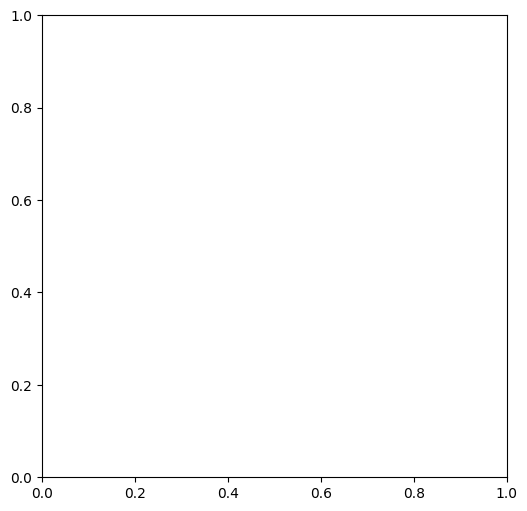

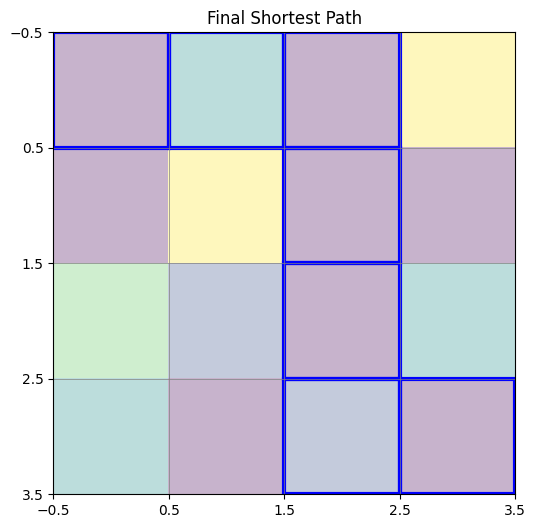

In [2]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def dijkstra_on_grid_visual(grid, start, end):
    """
    Runs Dijkstra’s algorithm on a grid while capturing snapshots of the algorithm's state.
    
    Parameters:
      grid: 2D list of non-negative integers representing cost to enter each cell.
      start: Tuple (row, col) for the starting cell.
      end: Tuple (row, col) for the destination cell.
    
    Returns:
      snapshots: A list of tuples (visited, frontier, costs) captured during execution.
      path: The final shortest path from start to end as a list of (row, col) tuples.
    """
    rows, cols = len(grid), len(grid[0])
    # Initialize cost matrix with infinity.
    costs = [[float('inf')] * cols for _ in range(rows)]
    sr, sc = start
    costs[sr][sc] = grid[sr][sc]  # Depending on the problem, you might start with 0.
    
    # Priority queue holds tuples of (current_cost, row, col).
    pq = [(costs[sr][sc], sr, sc)]
    
    visited = set()
    snapshots = []
    # Save initial state snapshot.
    snapshots.append((set(visited), list(pq), [row[:] for row in costs]))
    
    # For reconstructing the final shortest path.
    parent = {start: None}
    
    while pq:
        curr_cost, r, c = heapq.heappop(pq)
        if (r, c) in visited:
            continue
        visited.add((r, c))
        
        # Save snapshot after marking a cell as visited.
        snapshots.append((set(visited), list(pq), [row[:] for row in costs]))
        
        if (r, c) == end:
            break
        
        # Explore valid neighbors (up, down, left, right).
        for dr, dc in [(0,1), (0,-1), (1,0), (-1,0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols:
                new_cost = curr_cost + grid[nr][nc]
                if new_cost < costs[nr][nc]:
                    costs[nr][nc] = new_cost
                    heapq.heappush(pq, (new_cost, nr, nc))
                    parent[(nr, nc)] = (r, c)
                    # Save a snapshot whenever the frontier is updated.
                    snapshots.append((set(visited), list(pq), [row[:] for row in costs]))
    
    # Reconstruct the shortest path from end back to start.
    path = []
    if end in parent:
        cur = end
        while cur is not None:
            path.append(cur)
            cur = parent.get(cur)
        path.reverse()
    
    return snapshots, path

# Define a sample grid.
grid = [
    [1, 3, 1, 5],
    [1, 5, 1, 1],
    [4, 2, 1, 3],
    [3, 1, 2, 1]
]

start = (0, 0)   # Top-left corner.
end = (3, 3)     # Bottom-right corner.

# Run Dijkstra's algorithm and capture snapshots.
snapshots, path = dijkstra_on_grid_visual(grid, start, end)
print("Final shortest path:", path)

# ---------------- Visualization using Matplotlib ----------------

fig, ax = plt.subplots(figsize=(6,6))

def update(frame):
    ax.clear()
    visited, frontier, costs_snapshot = snapshots[frame]
    # Display the grid (using the original grid values for background).
    ax.imshow(np.array(grid), cmap='viridis', alpha=0.3, origin='upper')
    
    # Draw grid lines.
    rows, cols = len(grid), len(grid[0])
    ax.set_xticks(np.arange(-0.5, cols, 1))
    ax.set_yticks(np.arange(-0.5, rows, 1))
    ax.grid(color='gray', linestyle='-', linewidth=0.5)
    
    # Overlay visited cells (red squares).
    for (r, c) in visited:
        rect = plt.Rectangle((c-0.5, r-0.5), 1, 1, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)
    
    # Overlay frontier cells (yellow squares).
    for (_, r, c) in frontier:
        rect = plt.Rectangle((c-0.5, r-0.5), 1, 1, edgecolor='yellow', facecolor='none', linewidth=2)
        ax.add_patch(rect)
    
    ax.set_title(f"Step {frame+1}/{len(snapshots)}")

ani = FuncAnimation(fig, update, frames=len(snapshots), repeat=False, interval=300)
plt.show()

# After the animation, plot the final grid with the shortest path overlaid.
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.imshow(np.array(grid), cmap='viridis', alpha=0.3, origin='upper')
rows, cols = len(grid), len(grid[0])
ax2.set_xticks(np.arange(-0.5, cols, 1))
ax2.set_yticks(np.arange(-0.5, rows, 1))
ax2.grid(color='gray', linestyle='-', linewidth=0.5)

# Overlay the shortest path in blue.
for (r, c) in path:
    rect = plt.Rectangle((c-0.5, r-0.5), 1, 1, edgecolor='blue', facecolor='none', linewidth=3)
    ax2.add_patch(rect)

ax2.set_title("Final Shortest Path")
plt.show()